In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('mnist1.5k.csv')

data.columns = data.columns.str.lower()

data.head()

,label,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 785 entries, label to pixel 784
dtypes: int64(785)
memory usage: 9.0 MB


In [4]:
data.describe()

,label,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
count,1500.000000,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0
mean,4.420000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.882558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[<AxesSubplot: title={'center': 'label'}>]], dtype=object)

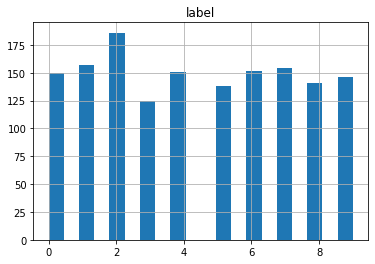

In [5]:
data.hist(column='label', bins=20)

In [6]:
data.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [7]:
x = data.drop(columns=['label'], axis=1)
y = data.label

In [8]:
from time import time


def timer_func(func):
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.4f}s')
        return result
    return wrap_func

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1200, 784), (300, 784), (1200,), (300,))

In [10]:
from sklearn.linear_model import LogisticRegression

@timer_func
def logistic_regression_model():
    model = LogisticRegression(max_iter=1_000)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    print(classification_report(predict, y_test))
    return predict

In [11]:
predict = logistic_regression_model()

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.96      0.85      0.90        27
           2       0.97      0.88      0.92        41
           3       0.67      0.89      0.76        18
           4       0.90      0.90      0.90        29
           5       0.79      0.76      0.78        25
           6       0.91      0.97      0.94        30
           7       0.91      0.89      0.90        36
           8       0.57      0.76      0.65        21
           9       0.94      0.87      0.91        39

    accuracy                           0.87       300
   macro avg       0.86      0.87      0.86       300
weighted avg       0.89      0.87      0.88       300

Function 'logistic_regression_model' executed in 0.8334s


In [12]:
sum(np.array(predict == y_test)) / len(y_test)

0.8733333333333333

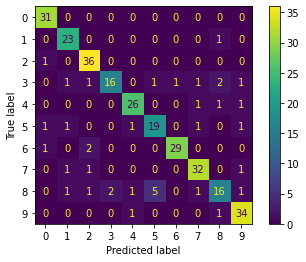

In [13]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


@timer_func
def svm_model():
    param_kernel = ['linear', 'rbf', 'poly', 'sigmoid']
    params = {'kernel': param_kernel}
    model = SVC()
    grid_search_svm = GridSearchCV(estimator=model, param_grid=params, cv = 6)
    grid_search_svm.fit(x_train, y_train)
    best_model = grid_search_svm.best_estimator_
    print(best_model.kernel)
    predict = best_model.predict(x_test)
    print(classification_report(predict, y_test))
    return predict

In [15]:
predict = svm_model()

rbf
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.96      0.92      0.94        25
           2       1.00      0.90      0.95        41
           3       0.79      0.90      0.84        21
           4       0.90      0.93      0.91        28
           5       0.92      0.88      0.90        25
           6       0.94      0.97      0.95        31
           7       0.86      0.91      0.88        33
           8       0.75      0.88      0.81        24
           9       0.94      0.87      0.91        39

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

Function 'svm_model' executed in 4.7052s


In [16]:
sum(np.array(predict == y_test)) / len(y_test)

0.91

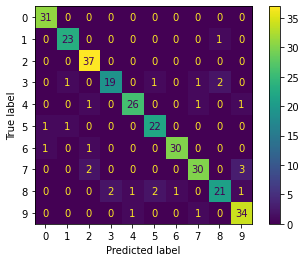

In [17]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


@timer_func
def KNN_model():
    number_of_n = np.arange(3, 10, 25)
    model = KNeighborsClassifier()
    params = {'n_neighbors': number_of_n}
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv = 6)
    grid_search.fit(x_train, y_train)
    print(grid_search.best_estimator_)
    predict = grid_search.predict(x_test)
    print(classification_report(predict, y_test))
    return predict

In [19]:
predict = KNN_model()

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        36
           1       0.96      0.74      0.84        31
           2       0.97      1.00      0.99        36
           3       0.79      0.90      0.84        21
           4       0.93      0.77      0.84        35
           5       0.83      0.83      0.83        24
           6       0.94      1.00      0.97        30
           7       0.83      0.91      0.87        32
           8       0.64      0.90      0.75        20
           9       0.81      0.83      0.82        35

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.89      0.87      0.87       300

Function 'KNN_model' executed in 0.1673s


In [20]:
sum(np.array(predict == y_test)) / len(y_test)

0.8733333333333333

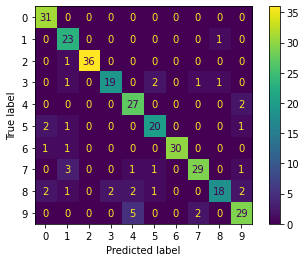

In [21]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()